In the project.. I am going to try to figure out what kind of difference will happen in visualization before and after prediction NaN data from in the initial dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)

In [2]:
df = pd.read_csv('/content/Video_Games_Sales.csv')

df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
len(df) # no of entries

16719

In [4]:
# Check for missing data in the csv
print("Missing values:")
print(df.isnull().sum())

# data types
print("\nData types of each column:")
print(df.dtypes)

Missing values:
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

Data types of each column:
Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object


In [5]:
df1 = df.drop('Name', axis=1)
df1.head()

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
from sklearn.preprocessing import OneHotEncoder

In [7]:
# Encoding categorical data using one-hot encoding

categorical_columns = df1.select_dtypes(include=['object']).columns

encoder = OneHotEncoder()

df_encoded = pd.DataFrame(encoder.fit_transform(df1[categorical_columns]).toarray(), columns=encoder.get_feature_names_out(categorical_columns))

In [8]:
from sklearn.impute import KNNImputer

In [9]:
# Concatenating the encoded categorical data with the numerical data

df_concat = pd.concat([df_encoded, df1.select_dtypes(exclude=['object'])], axis=1)

# Predicting the values through KNN
imputer = KNNImputer(n_neighbors=5)
df_impute = pd.DataFrame(imputer.fit_transform(df_concat), columns=df_concat.columns)

In [18]:
df_impute['Name'] = df['Name']

In [13]:

# Checking missing values after predication of those values
print("\Missing values after prediction:")
print(df_impute.isnull().sum())

# Check for duplicate rows and deleting them
print("\nNumber of duplicate rows:")
print(df_impute.duplicated().sum())

df_impute = df_impute.drop_duplicates()


\Missing values after prediction:
Platform_2600    0
Platform_3DO     0
Platform_3DS     0
Platform_DC      0
Platform_DS      0
                ..
Global_Sales     0
Critic_Score     0
Critic_Count     0
User_Count       0
Name             2
Length: 2439, dtype: int64

Number of duplicate rows:
0


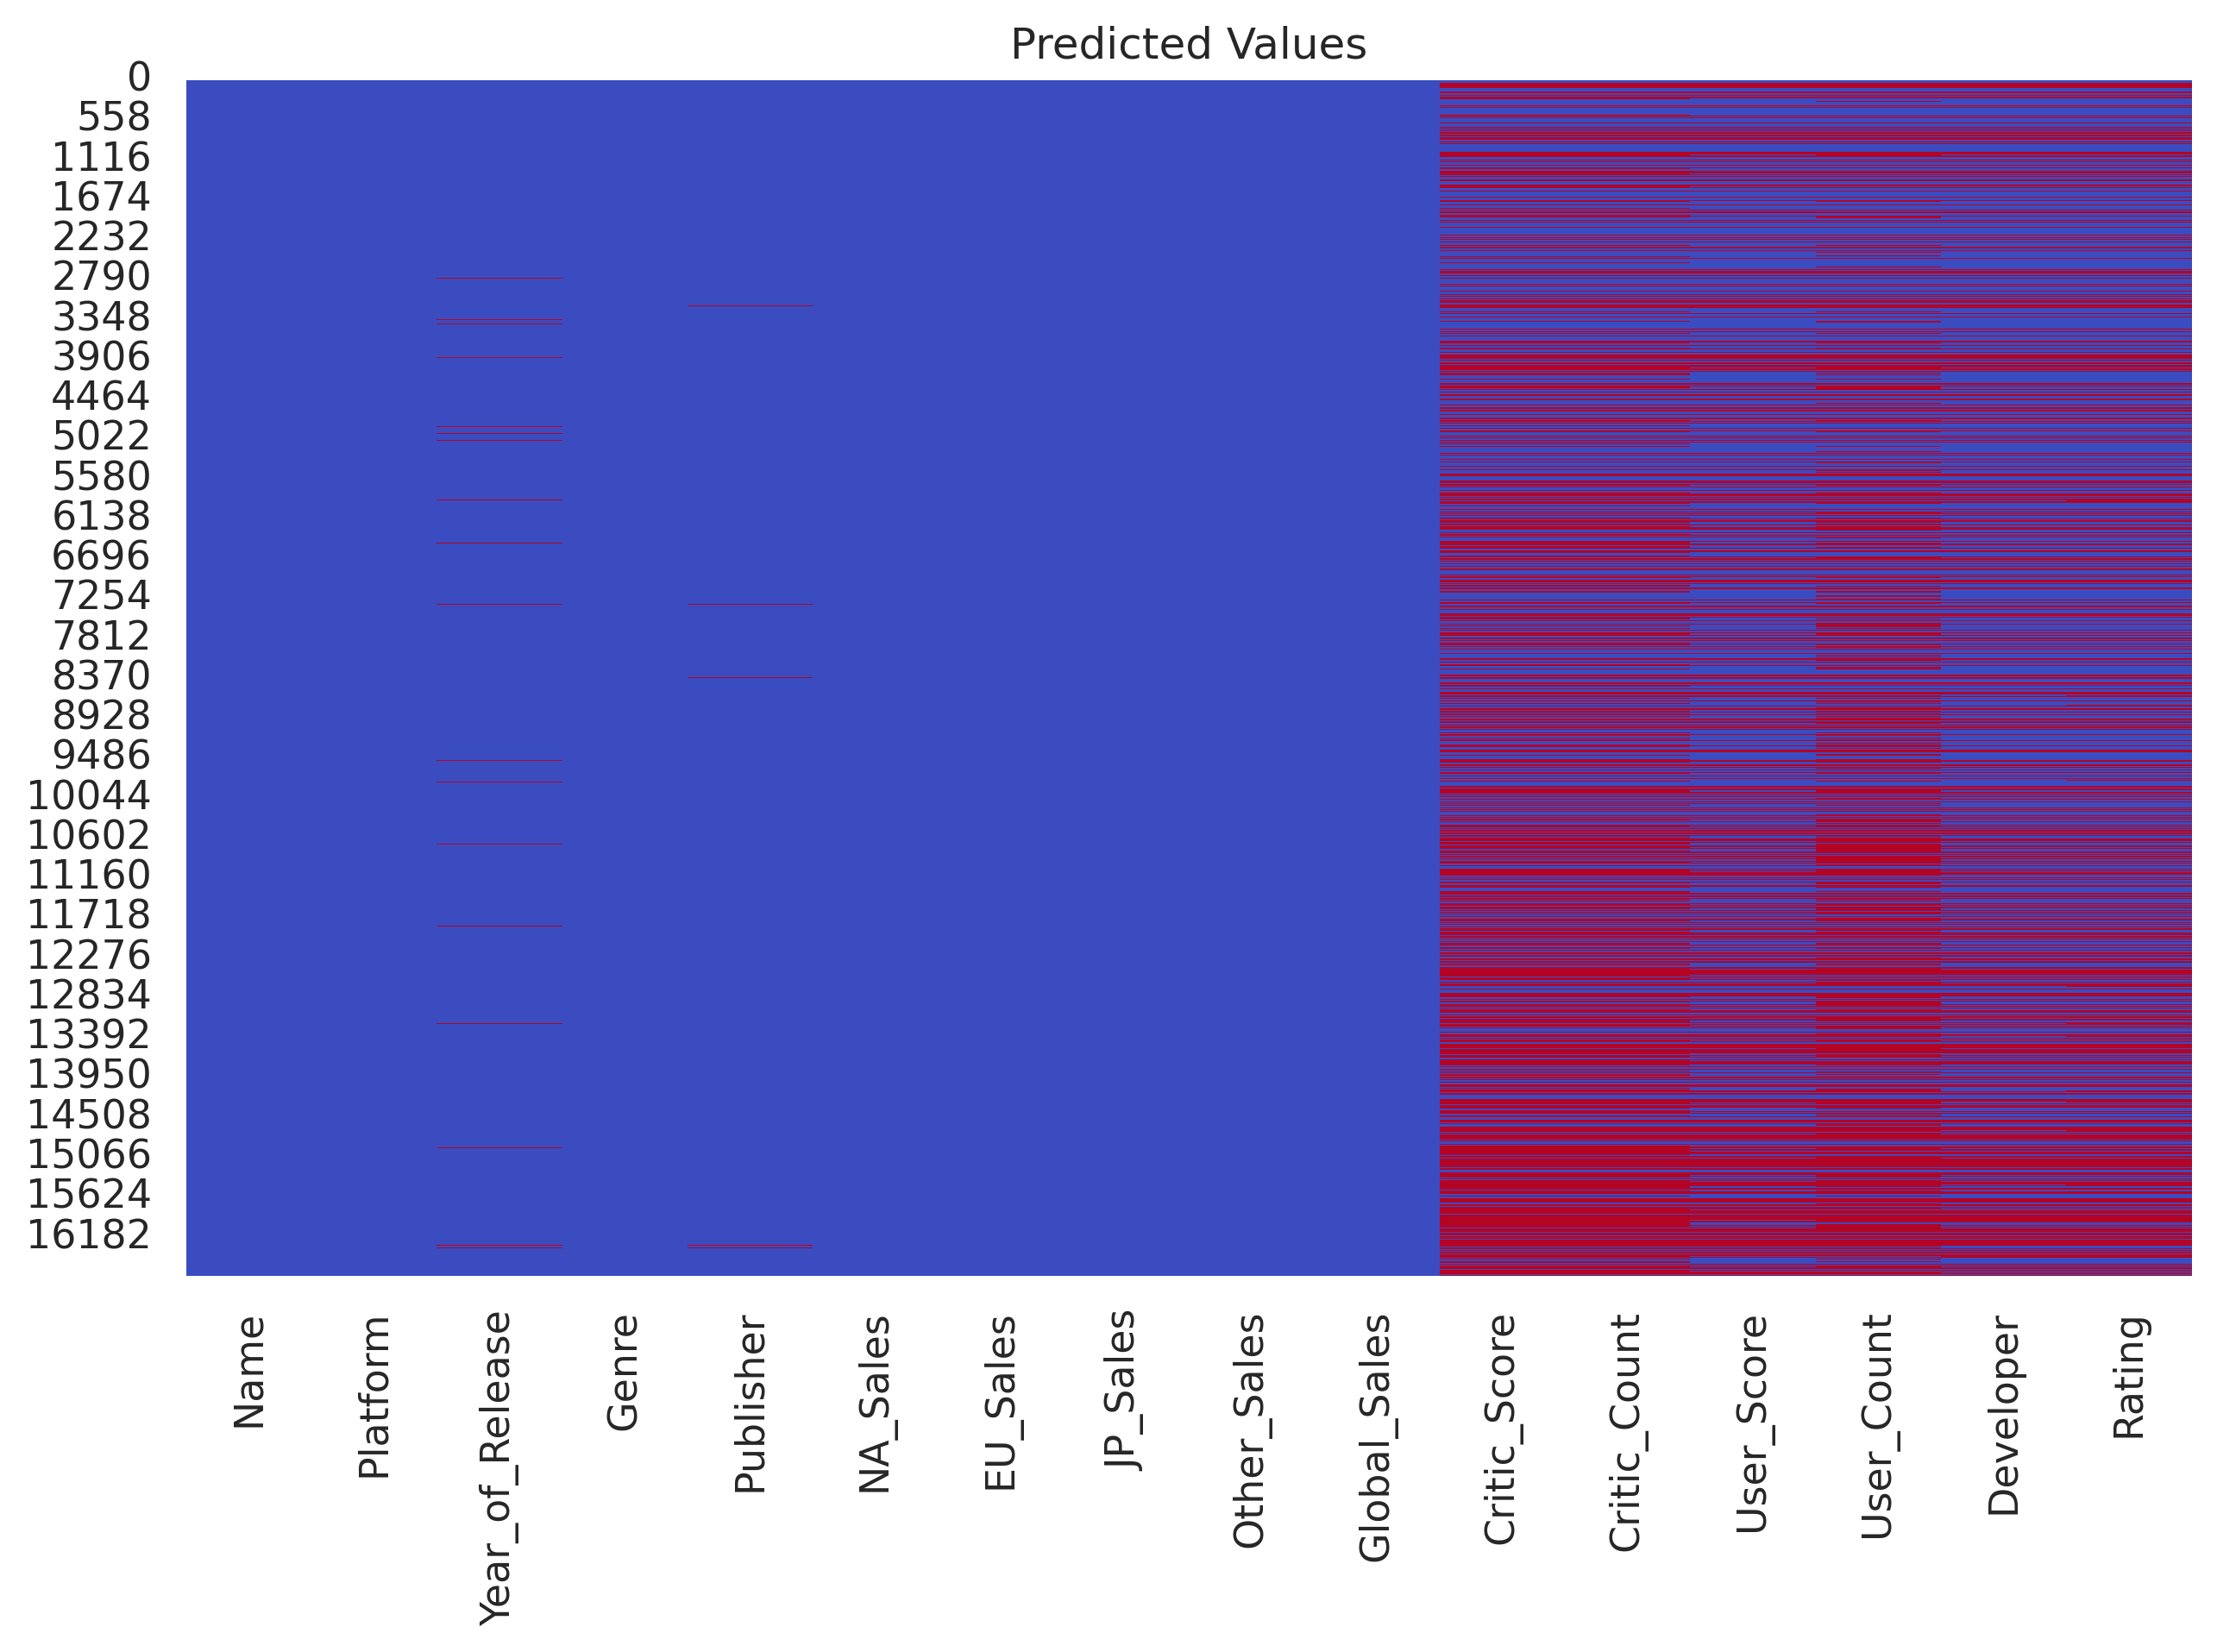

In [17]:
missing = df.isnull().astype(int)

# Plot the heatmap
plt.figure(figsize=(10, 6),dpi=300)
sns.heatmap(missing, cmap='coolwarm', cbar=False)

plt.title('Predicted Values')

# Show the plot
plt.show()

#Visualization - after prediction

In [24]:
dfafter = df1.groupby('Genre', as_index=False)['Global_Sales'].sum()
dfafter

,Genre,Global_Sales
0,Action,1745.27
1,Adventure,237.69
2,Fighting,447.48
3,Misc,803.18
4,Platform,828.08
5,Puzzle,243.02
6,Racing,728.90
7,Role-Playing,934.40
8,Shooter,1052.94
9,Simulation,390.42


In [35]:
dfafter.nlargest(len(dfafter),'Global_Sales')

,Genre,Global_Sales
0,Action,1745.27
10,Sports,1332.00
8,Shooter,1052.94
7,Role-Playing,934.40
4,Platform,828.08
3,Misc,803.18
6,Racing,728.90
2,Fighting,447.48
9,Simulation,390.42
5,Puzzle,243.02


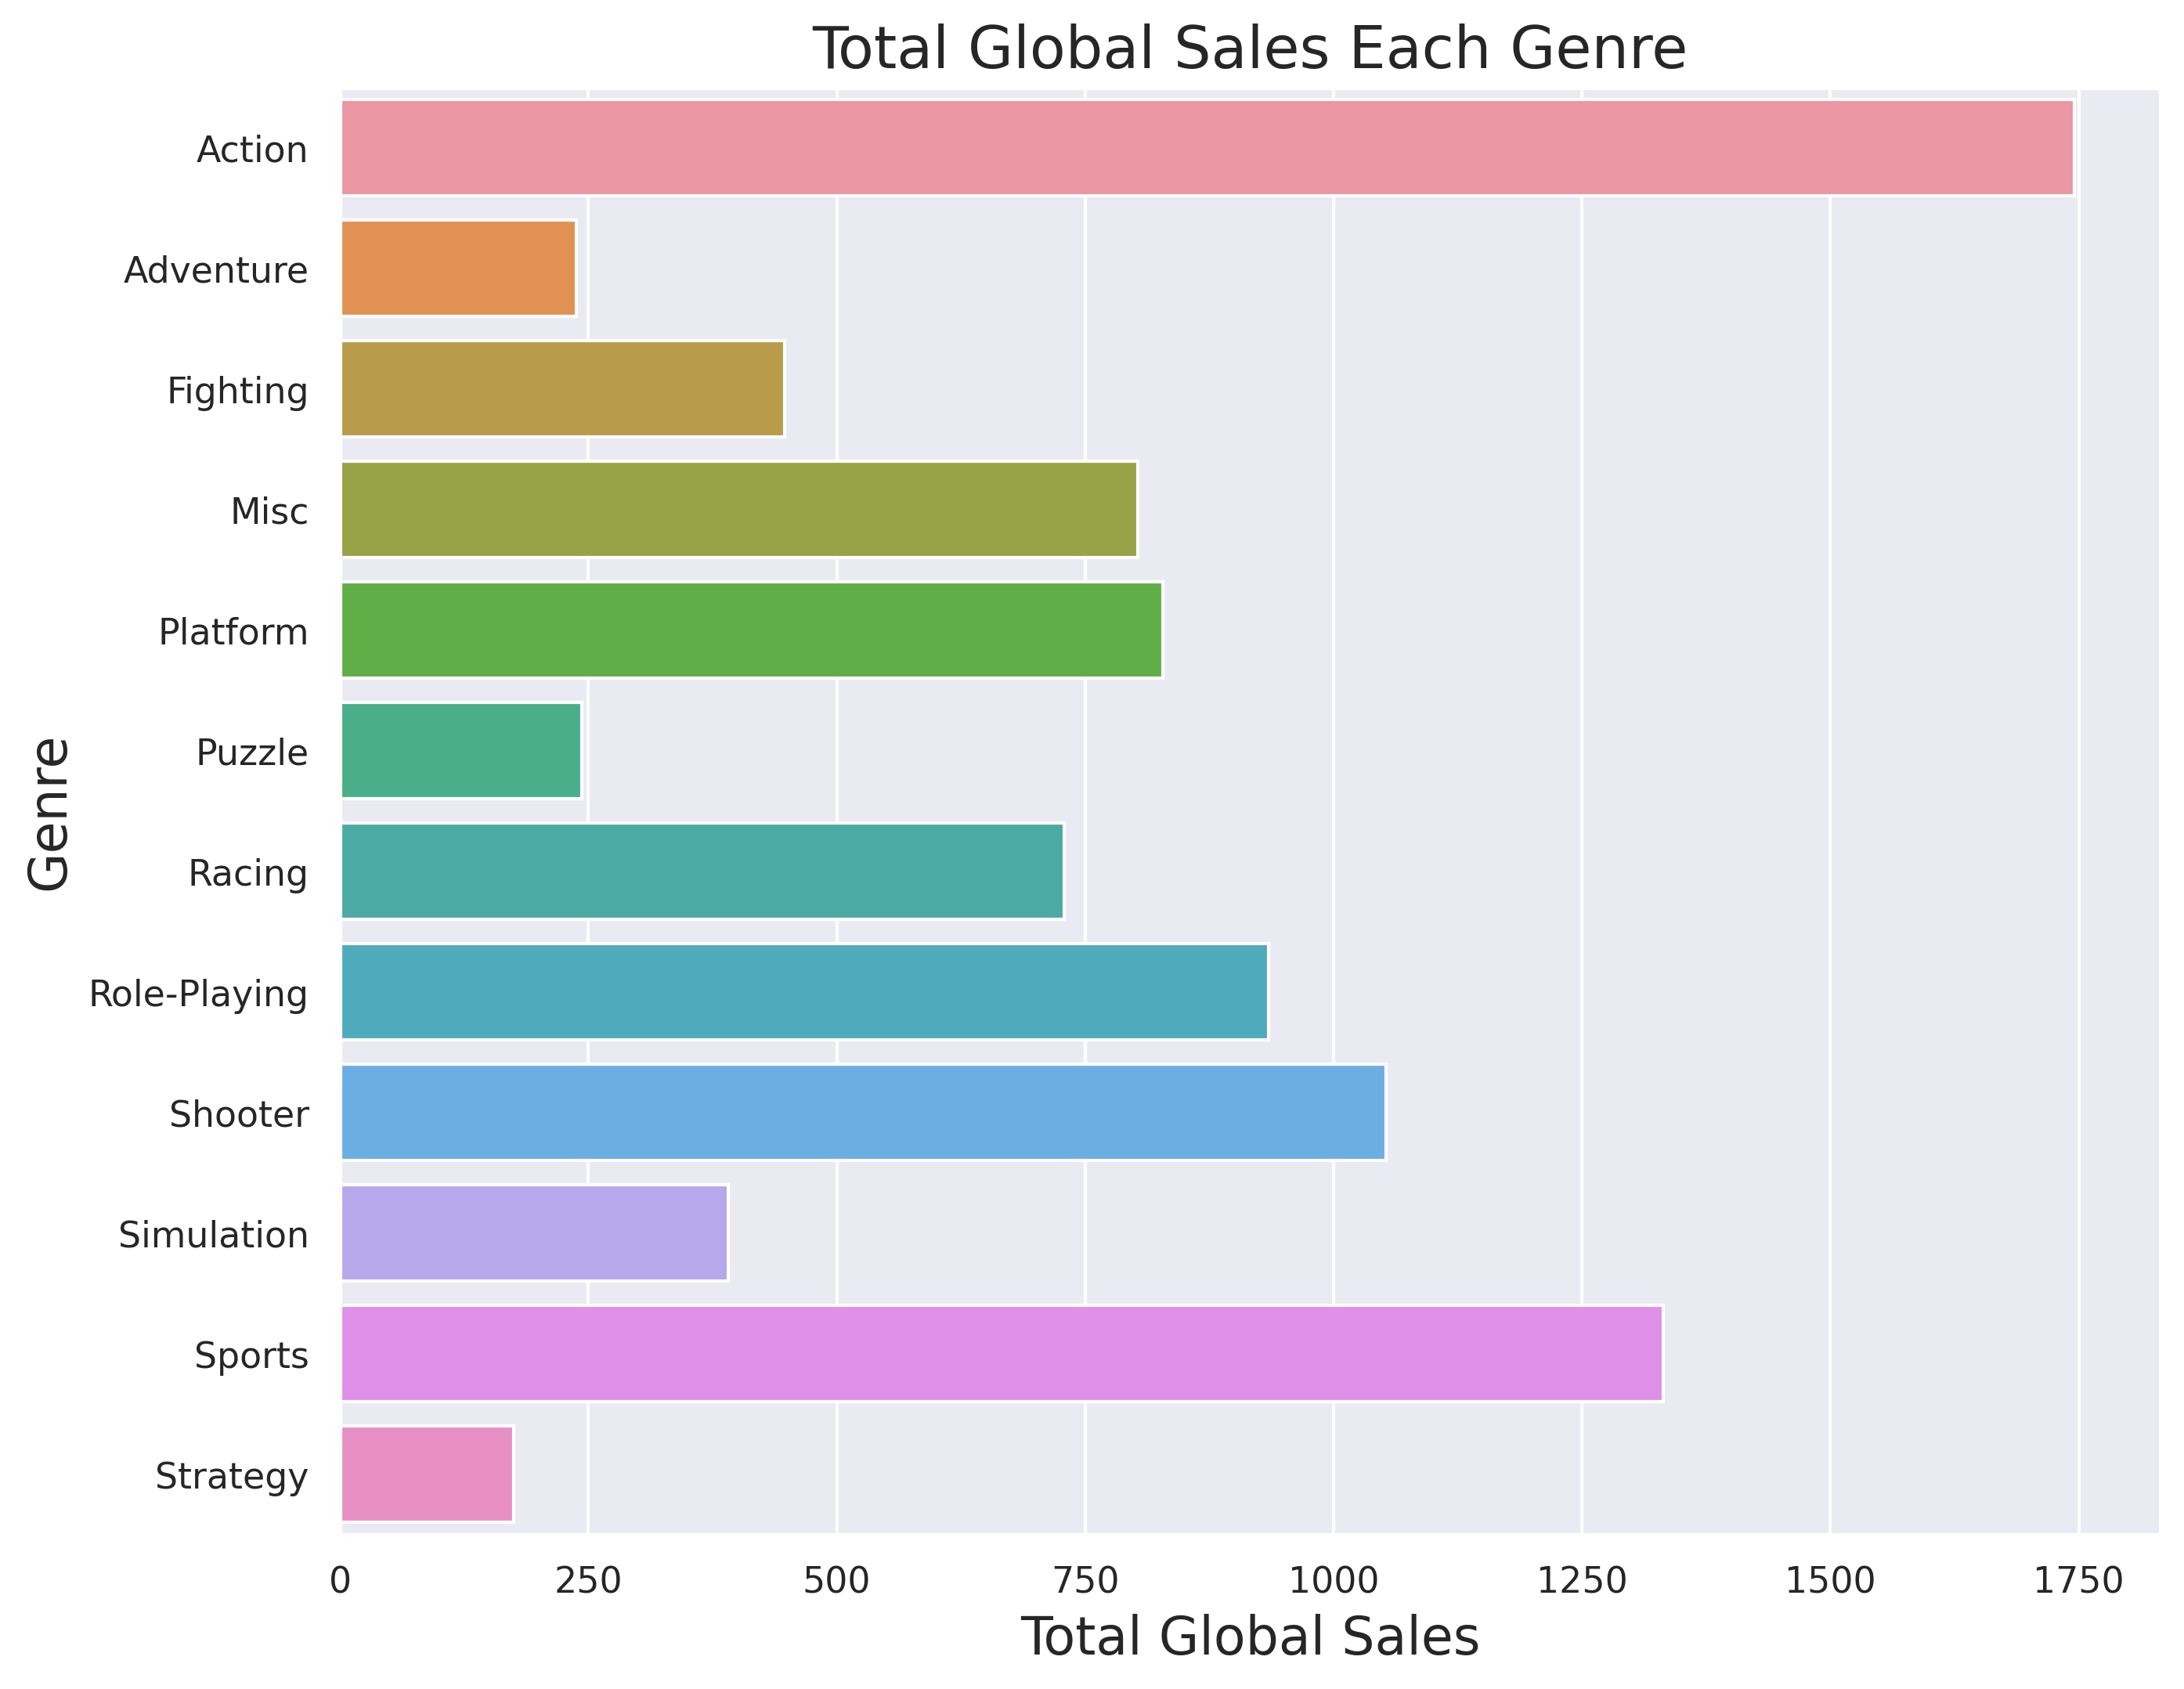

In [36]:
#Show Bar Chart
plt.figure(figsize=(10,8),dpi=300)
sns.barplot(data=dfafter, x='Global_Sales', y='Genre')
plt.title('Total Global Sales Each Genre', fontsize=18)
plt.xlabel ('Total Global Sales', fontsize=16)
plt.ylabel ('Genre', fontsize=16)
plt.show()

#Visualization - without missing values prediction

In [26]:
df2 = df.dropna()
df2

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T


In [27]:
dfbefore = df2.groupby('Genre', as_index=False)['Global_Sales'].sum()
dfbefore

,Genre,Global_Sales
0,Action,1203.16
1,Adventure,80.75
2,Fighting,249.95
3,Misc,416.26
4,Platform,377.80
5,Puzzle,78.90
6,Racing,476.22
7,Role-Playing,501.37
8,Shooter,816.48
9,Simulation,202.70


In [28]:
dfbefore.nlargest(len(dfbefore),'Global_Sales')

,Genre,Global_Sales
0,Action,1203.16
10,Sports,833.85
8,Shooter,816.48
7,Role-Playing,501.37
6,Racing,476.22
3,Misc,416.26
4,Platform,377.80
2,Fighting,249.95
9,Simulation,202.70
1,Adventure,80.75


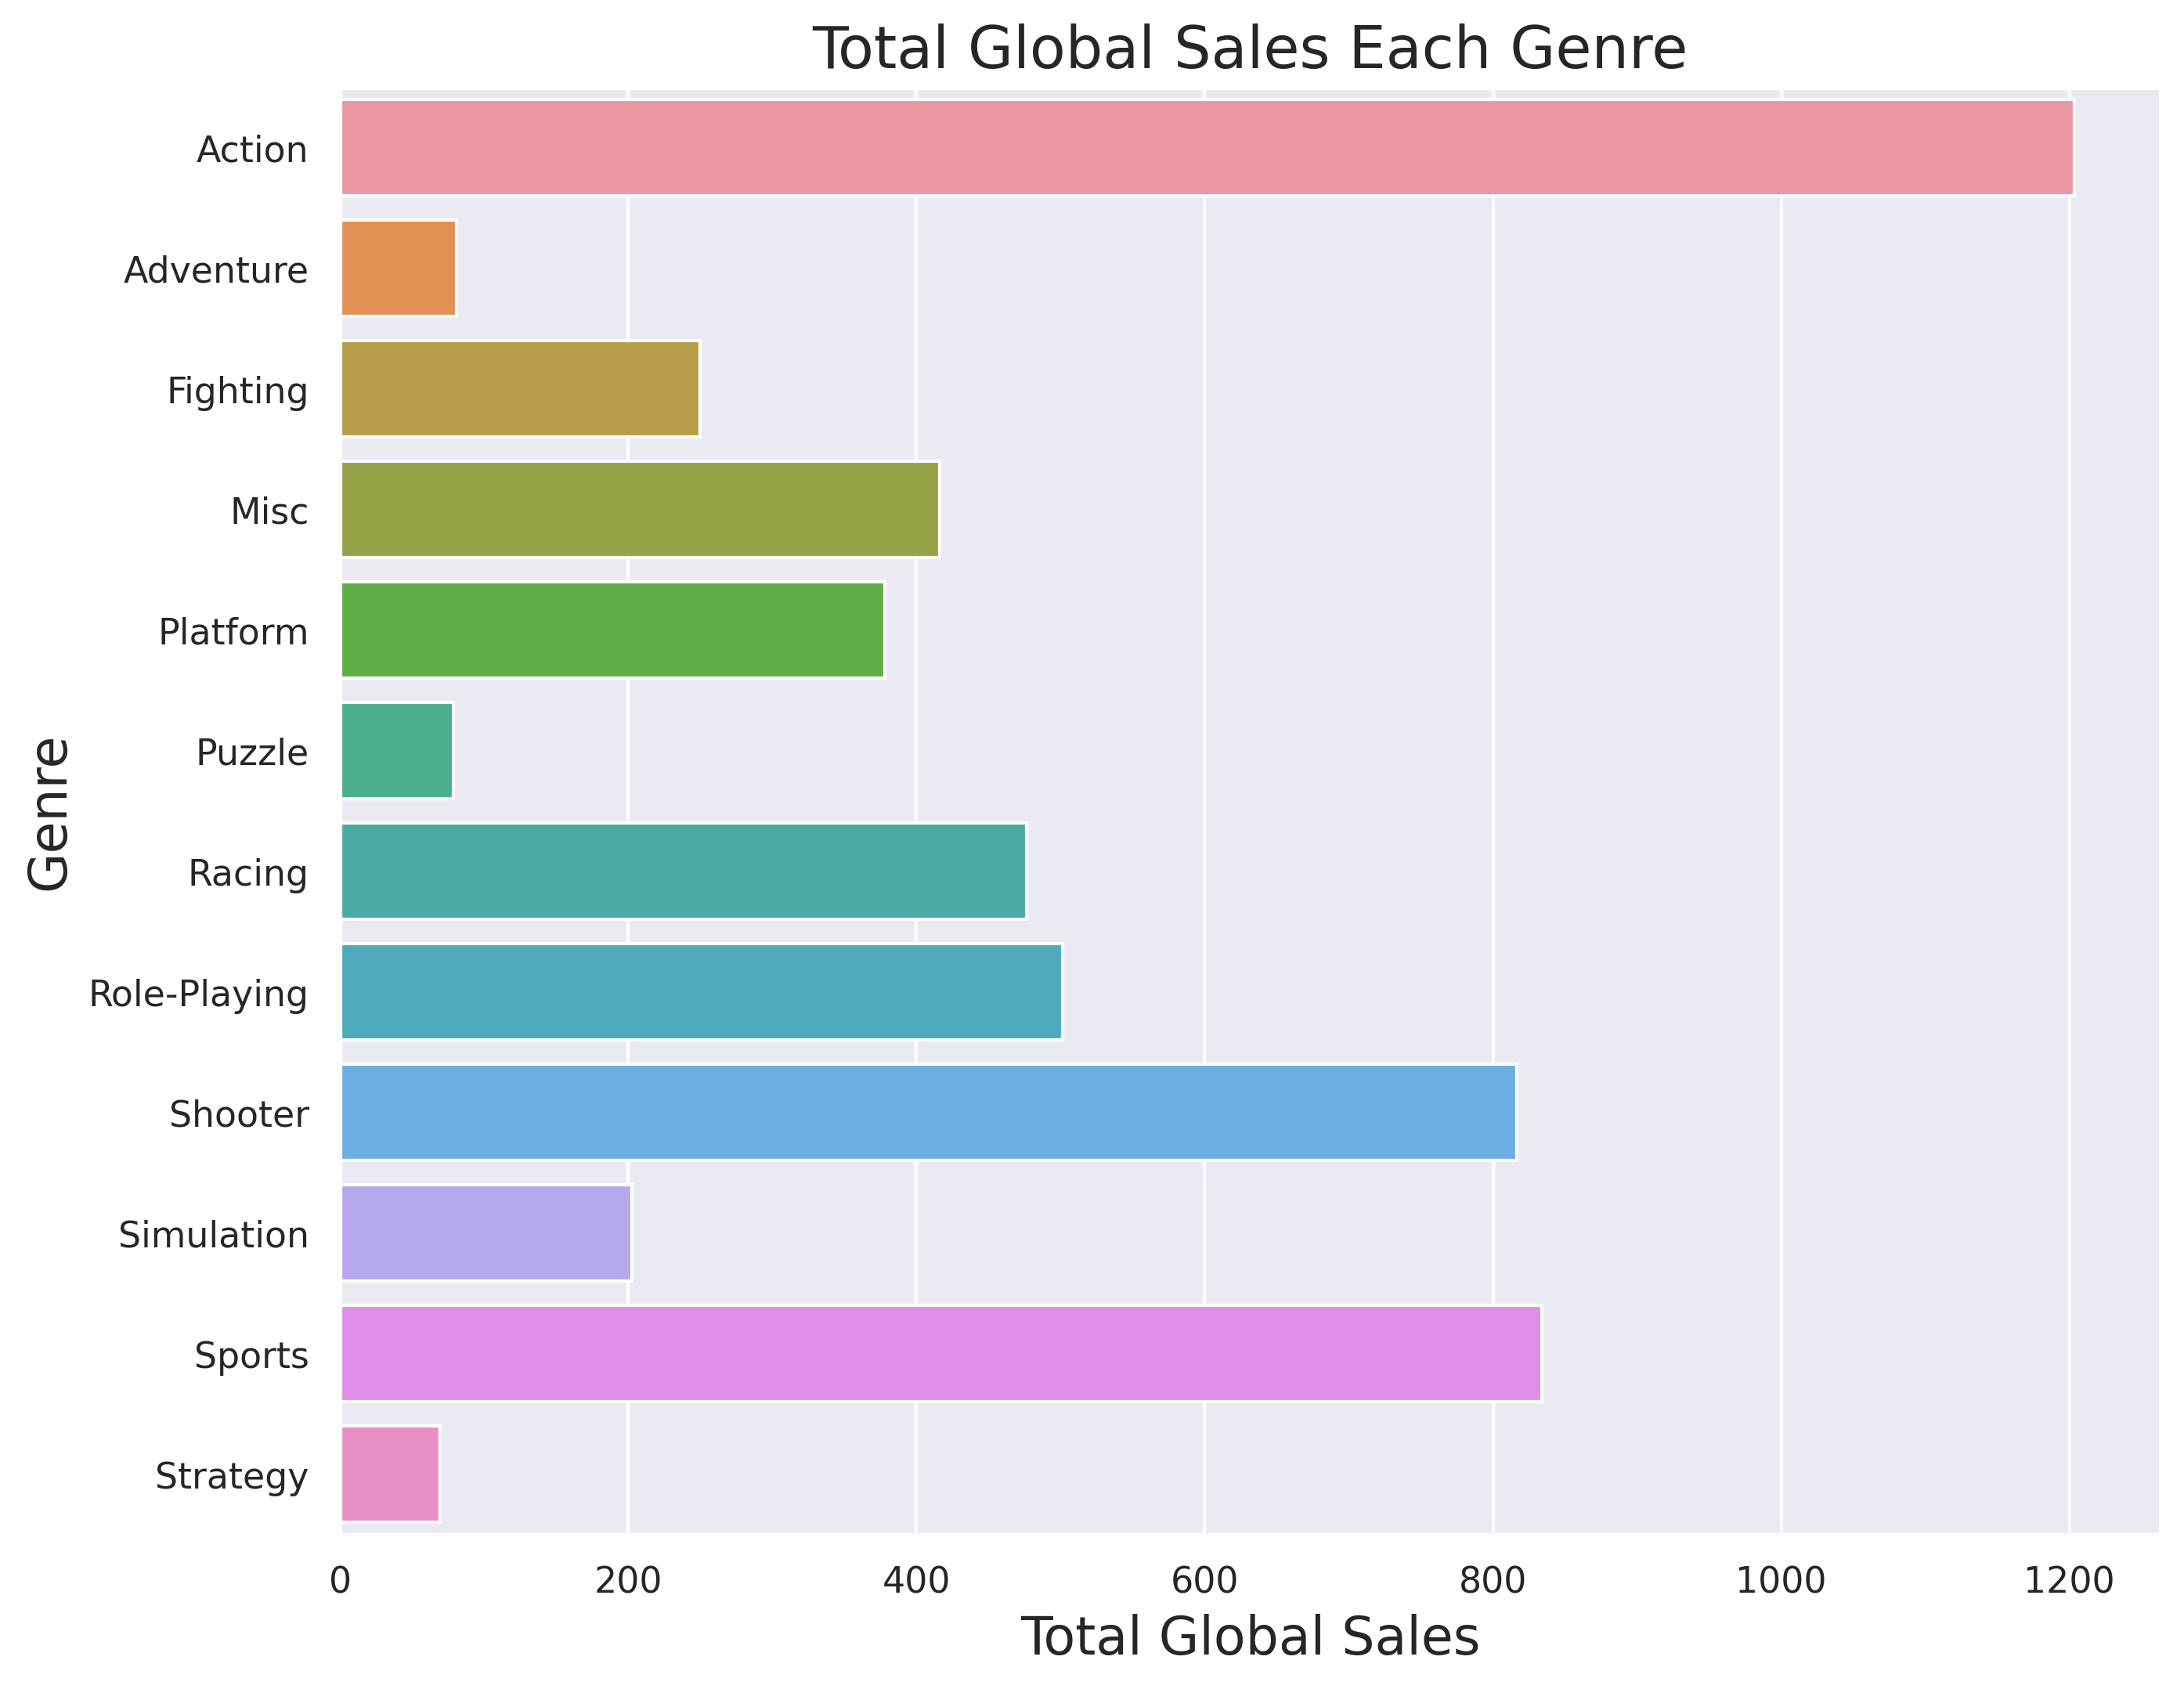

In [29]:
#Show Bar Chart
plt.figure(figsize=(10,8),dpi=300)
sns.barplot(data=dfbefore, x='Global_Sales', y='Genre')
plt.title('Total Global Sales Each Genre', fontsize=18)
plt.xlabel ('Total Global Sales', fontsize=16)
plt.ylabel ('Genre', fontsize=16)
plt.show()

# Comparison before vs. after

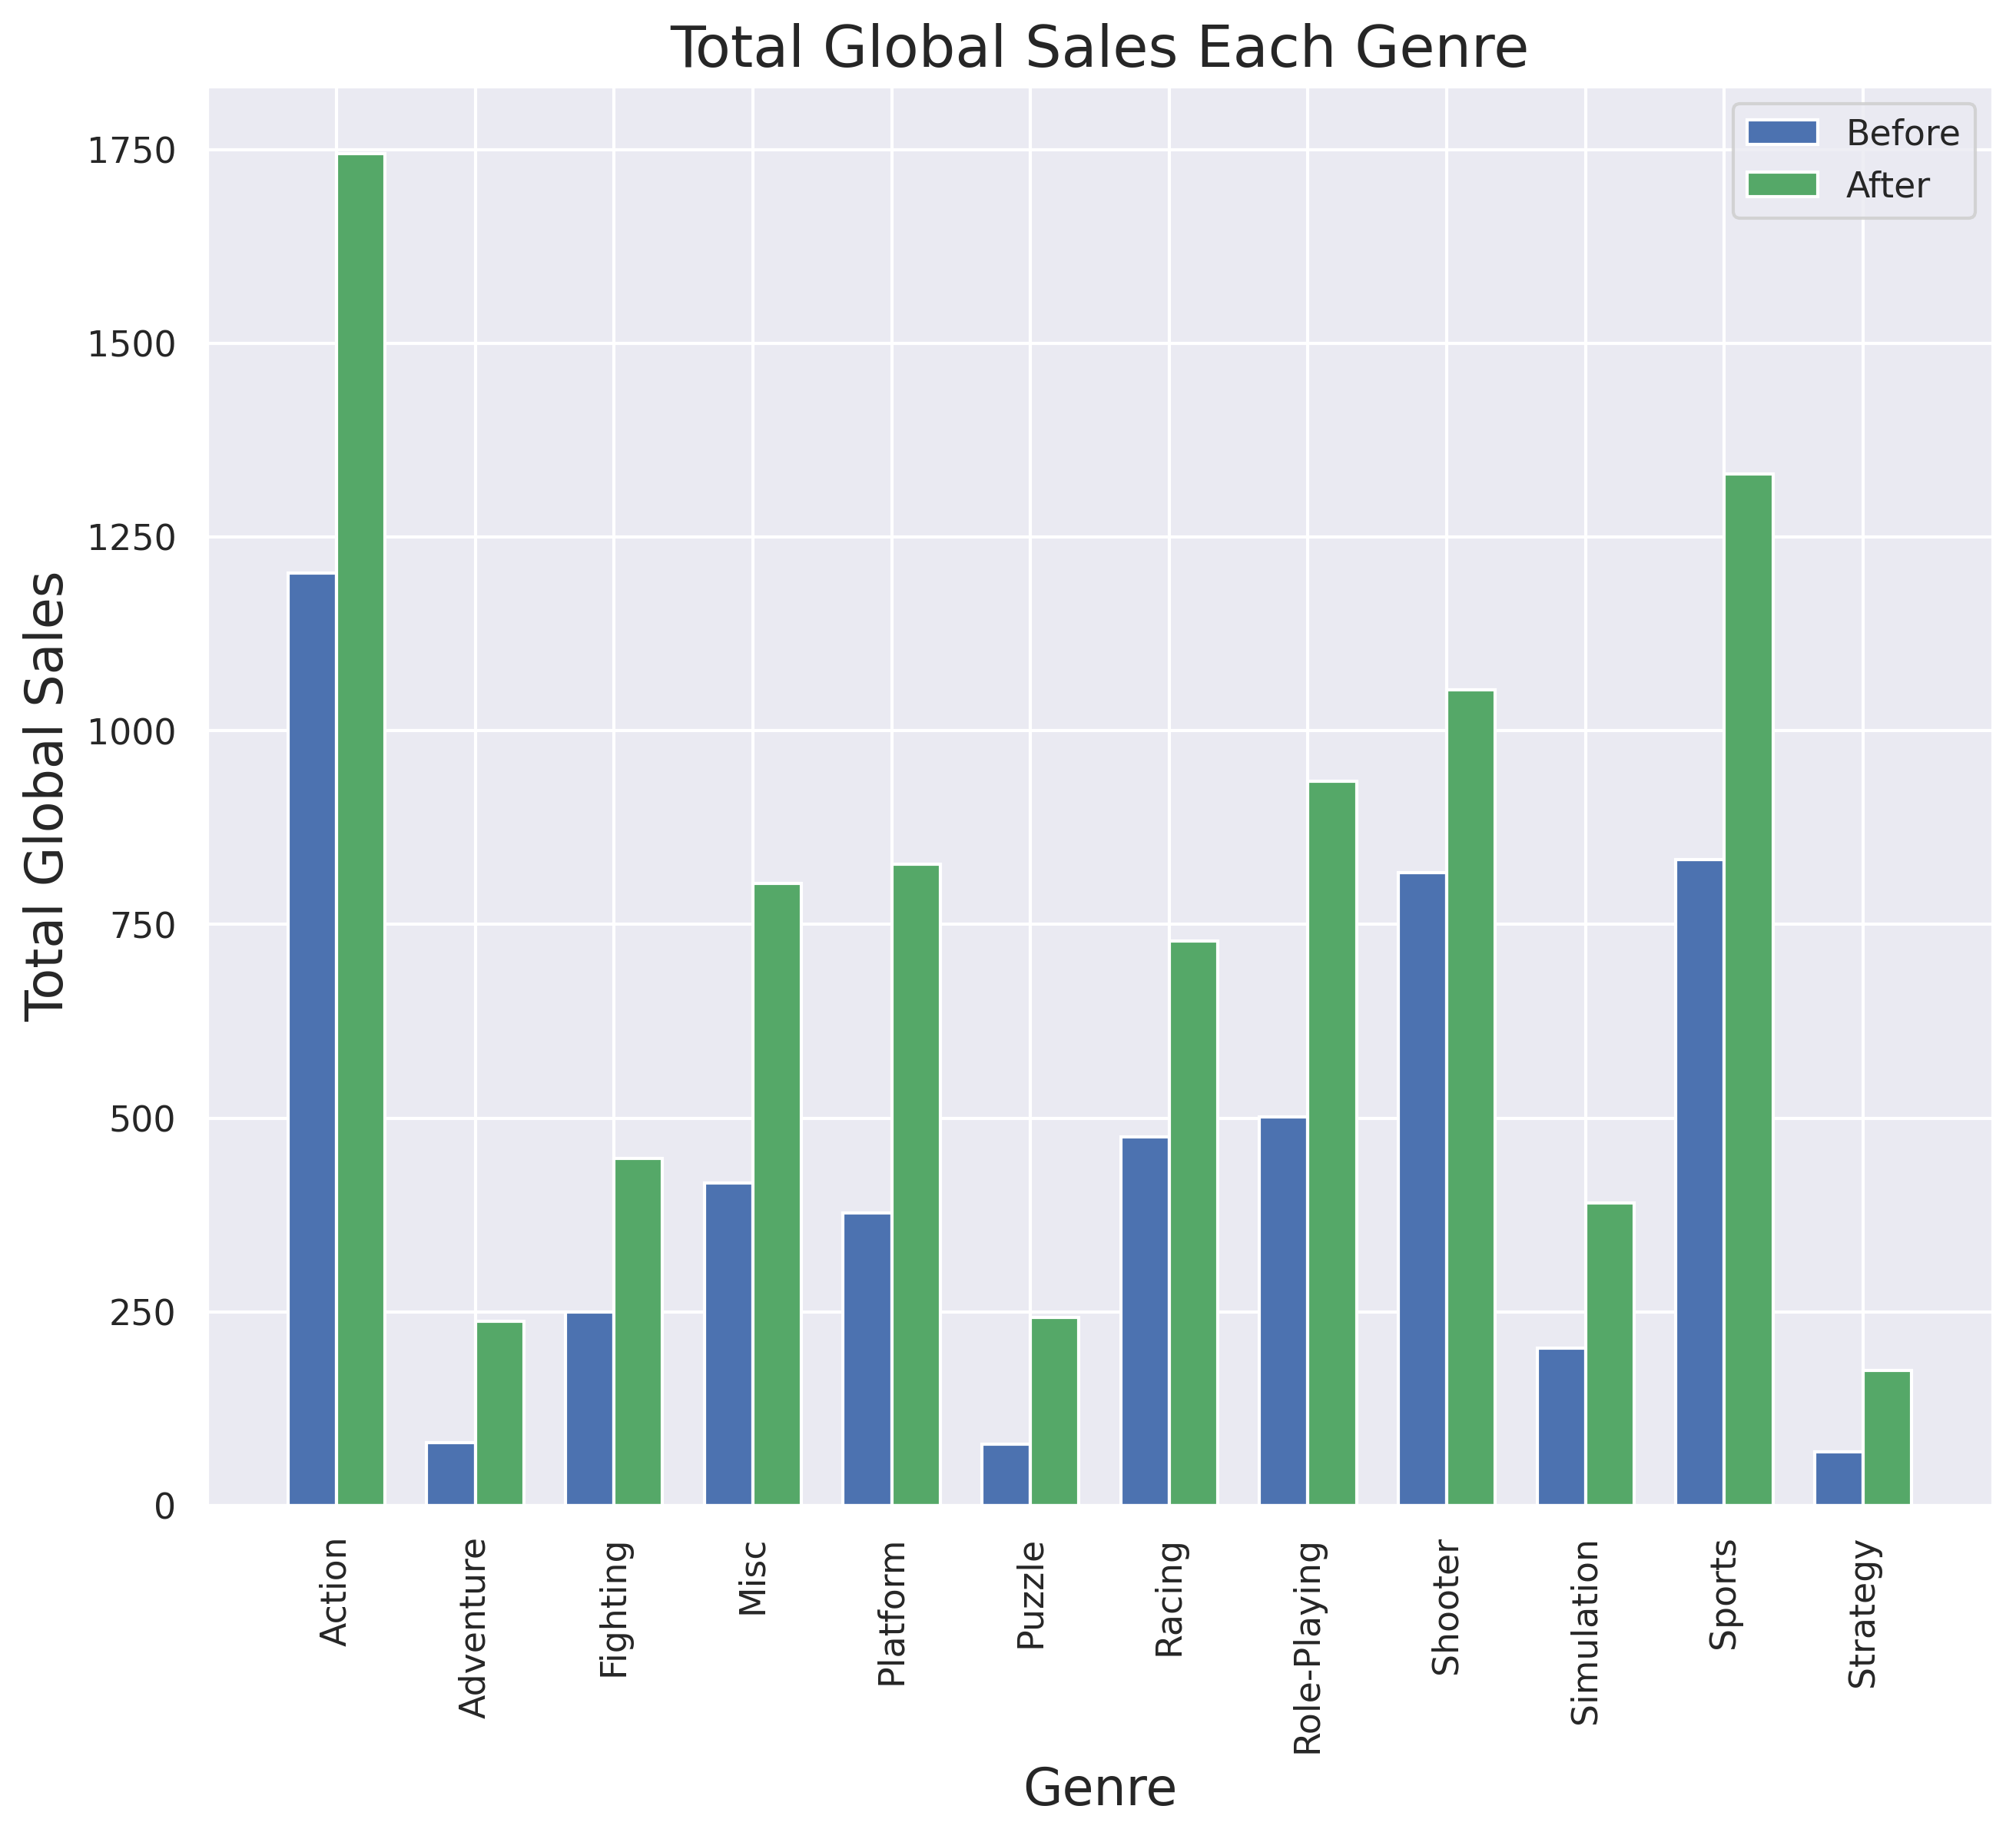

In [38]:

# Get the genre categories from one of the dataframes
genres = dfbefore['Genre'].unique()

# Set the width of each bar
bar_width = 0.35

# Set the position of the bars on the x-axis
r1 = np.arange(len(genres))
r2 = [x + bar_width for x in r1]

# Plot the grouped bar chart
plt.figure(figsize=(10, 8), dpi=300)

plt.bar(r1, dfbefore['Global_Sales'], color='b', width=bar_width, label='Before')
plt.bar(r2, dfafter['Global_Sales'], color='g', width=bar_width, label='After')

plt.title('Total Global Sales Each Genre', fontsize=18)
plt.xlabel('Genre', fontsize=16)
plt.ylabel('Total Global Sales', fontsize=16)
plt.xticks([r + bar_width / 2 for r in range(len(genres))], genres, rotation=90)
plt.legend()

plt.show()